In [3]:
from qiskit import *
from qiskit.extensions import *
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
import numpy as np
import math
import cmath
from IPython.core.display import HTML

# Introduction

This notebook explores the concept of entanglement in an experimental fashion similar to the previous page on Elitzur Vaidman Bombs, but instead through a game that you can play on this notebook, called the Magic Square Game. 

The Magic Square Game is based off of a concept known as Quantum Pseudo Telepathy. 

The term Quantum Pseudo Telepathy refers to the strategy of Quantum Entanglement. Quantum Entanglement and operators allows an individual to win a game even though a classical winning strategy is non-existent

Two other important terms related to this concept are locality and reality. Here is a brief definition of each one.

Locality: A theory that Einstein came up with suggesting that an occurrence at a particular location could not have an impact at another location within the time it would take for light to travel between the two locations. 

Realistic: Einstein claimed that there must be existence prior to measurement, in other words he believed something cannot be measured if it doesn't exist. 

On the other hand, Bohr claimed that measuring something brings about its existence which contrasted the idea of local reality.

You might be wondering how this relates to the Magic Square Game. Implementations of Quantum Pseudo Telepathy games such as the Magic Square Game below contribute strong evidence against a local realistic world, if it can be won through quantum entanglement but not through any classical methods. 

Before beginning to play the game, a brief description of the game might help. 

Rules/Goal:

1. Each of the squares in the 3 by 3 grid can be filled in with a 1 or a 0
2. The sum of the rows must be even
3. The sum of the columns must be odd
4. A value at the intersection of a row and column must satisfy the above requirements for the row and column respectively

Description: This simulation of the Magic Square Game is constructed from a circuit using qiskit. In this simulation the user will act as the referee for the players. Each player is assigned two qubits and from this an entangled state is created. Then the referee selects a row and column[input A, input B], based off of which player A and player B apply certain unitary transformations. Following this the qubits represenative of two of their column and row values are measured, and the players then decide upon a third value based on the parity they need. If the goal for each round of the game mentioned above is achieved, the players have won the game. To truly win the game and attribute this to quantum entanglement rather than chance, the players must win rounds continuosly, so the user can referee the game for multiple rounds in order to check this. Keep in mind also, that during the game the players are not discussing information regarding this, but rather using information that already exists from an earlier state of entanglement.

Example & scope: To give this more of a classical context, imagine that there is an odd number total of each crickets, frogs, and snakes in a given region. However, there is always a shortage or excess of food required for each of these animals in this particular location. For this problem you can assume on average each cricket,frog,or snake must receive a single unit of food. Therefore when there is no shortage or excess, then the amount of food for each animal must be represented by an even number cause there is an odd number of each animal. A total can be displayed as a linear combination of n terms, this information can be shown in a 3 by 3 grid, where the column sums display quantities of food and the row sums display the number of each animal. However if each square in a 3 by 3 grid represents one of three total terms(either 1 or 0) whose linear combination forms the sum of total number of animals or the total amount of food, then it is impossible for this scenario to exist within the 3 by 3 grid, at least using classical mathematics. On the other hand, with a quantum approach, a “winning strategy” can be developed. So, if a random sequence of three terms, each either one or zeros is created for the linear combination of one animal and similarly a random linear combination of the food quantities is created, in both cases only using 0 and 1, and the sum of the food row is even while the column value representing the number of animals is odd, then the players(food and animals) win. Otherwise the food and animals would not balance each other. It is important that where the values intersect they match, as these are dependent variables. As crickets, frogs, and snakes are part of a food web, a change in the quantity of food available for crickets can impact the number of snakes. This example shows possible applications of this concept in fields such as Biology.

Quantum Strategy: The main reason the quantum strategy succeedes is that in a given row and column, all operators share the same eigenbasis; that is, the measurements the two players will perform correspond to simultaneous observables. This garuntees that the numbers each player recieves will not change if the other player makes a measurement, and the players will recieve the same number at the intersection of the row and column. Furthermore, the operators the players use are placed in the magic square so that the parity of a row or column works out correctly, meaning we only need to make two measurements to win as the third will be implied by the needed parity of the row or column.

# Playing the Game

Instructions on playing the magic square game within this notebook:
Note: The game can be played without opening the notebook locally, although features such as a generated Magic Square Visualization for each round and link at bottom may not work. 
1. After opening up the notebook, select the first cell and click "Run" from the menu above. 
2. If there is any output for that cell, it will be displayed beneath it. Following this the next cell will be selected. The first cell is just adding the packages, and the second cell provides an introduction to the material, followed by these instructions. 
3. Read through what each cell does,and continue to Run the circuit.
4. After the game setup and creation of the initial state, a prompt will appear. Select a row number 1 through 3 for player A and hit enter.
5. Similarly select a column number 1 through 3 for player B and hit enter.
6. Continue to Run the cells. Stop after running the last cell. 
7. Notice if the players won the game, the word True will appear under the cell along with the Magic Square showing the intersection of their row and column comprised of the bit values
8. Otherwise the word False will appear beneath the cell
9. Once you have completed a round, click on the link at the bottom to play another round. It will take you to the point(Game Setup) where the game begins, but make sure to click on the cell again for it to run. If you do not have access to the link you can scroll directly to Game Setup. 

# Game Setup: Create the Measurement Operators

The measurement operators shown below only need to be generated once for the game.

In [4]:
# These are the unitary transformations that will be applied to each players qubits
B3= np.array([[1,0,0,1],[-1,0,0,1],[0,1,1,0],[0,1,-1,0]])* (1/math.sqrt(2))
B2 = np.array([[-1,1j,1,1j],[1,1j,1,-1j],[1,-1j,1,1j],[-1,-1j, 1,-1j]])*(1/2)
B1 = np.array([[1j,-1j,1,1],[-1j,-1j,1,-1],[1,1,-1j,1j],[-1j,1j,1,1]])*(1/2)
A3 = np.array([[-1,-1,-1,1],[1,1,-1,1],[1,-1,1,1],[1,-1,-1,-1]])*(1/2)
A2 = np.array([[1j,1,1,1j],[-1j,1,-1,1j],[1j,1,-1,-1j],[-1j,1,1,-1j]])*(1/2)
A1 = np.array([[1j,0,0,1],[0,-1j,1,0],[0,1j,1,0],[1,0,0,1j]])*(1/math.sqrt(2))
unitariesA = [A1, A2, A3]
unitariesB = [B1, B2, B3]

In [5]:
questionA = int(input("Select a Row for Player A's entry. Enter 1,2, or 3 for the corresponding row: "))

Select a Row for Player A's entry. Enter 1,2, or 3 for the corresponding row: 2


In [6]:
questionB = int(input("Select a Column for Player B's entry. Enter 1,2, or 3 for the corresponding column: "))

Select a Column for Player B's entry. Enter 1,2, or 3 for the corresponding column: 3


<a id="play"/>

# 1. Create the initial state

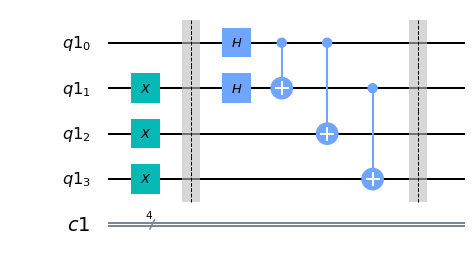

In [14]:
q = QuantumRegister(4)

# set register to 2 if we only want to measure one of the player's qubits
#c = ClassicalRegister(2)

# set register to 4 if we want to measure all of the qubits
c = ClassicalRegister(4)

circuit = QuantumCircuit(q,c)

circuit.x(q[1:4])
circuit.barrier()

#This applies a Haddamard Gate to qubits 1 and 2 in the circuit
circuit.h(q[0:2])

# Following this, three CNOT gates are applied that create a maximum entangled state for the 4 qubits
circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])
circuit.cx(q[1],q[3])

# Add a barrier to ensure that system preparation is done before our measurement operators are applied
circuit.barrier()

# Display for the initial entangled state of the four qubits representing the two players
circuit.draw(output='mpl')

# 2. Player 1 Selects a Row

Here we note which row player A is assinged and which column player B is assigned.

In [15]:
# Selecting Row for Player 1
selectedRowUnitary = unitariesA[questionA-1]

circuit.unitary(selectedRowUnitary,q[2:4], 'A')
circuit.barrier()
print("You selected A{}".format(questionA))

You selected A2


In [16]:
# Selecting Column for Player 2
selectedColumnUnitary = unitariesB[questionB-1]

circuit.unitary(selectedColumnUnitary,q[0:2])
circuit.barrier()
print("You selected B{}".format(questionB))

You selected B3


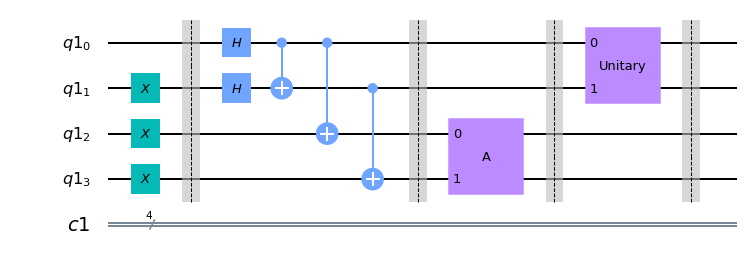

In [17]:
circuit.draw(output='mpl')

# Measure the System

In [18]:
# measure all of the qubits (be sure the ClassicalRegister was created w/ 4 qubits)
circuit.measure(q,c)

# Get a reference to the qasm simulator
backend = Aer.get_backend('qasm_simulator')
# Execute the circuit on the simulator
job = execute(circuit, backend, shots=1)
# Get the results
result = job.result()
# Returns counts
counts = result.get_counts(circuit)
print(counts)
# TODO: validate that we have one and only one key
bitstring = None
for key in counts.keys():
    bitstring = key
# bitstring = counts.keys()
print(bitstring)

{'1110': 1}
1110


# Calculate Parity Bits

Player A should measure a specific two-qubit state such as 01. Player A then needs to determine which bit is need to ensure an even parity. Likewise, Player B should measure and then based on the result, determine which bit is needed for an odd parity.

In [19]:
# starting from the left side of the bit string, bits 0 and 1 are for the row and 2 and 3 are for the column. 
# so bitstring 1001 would have row 10 and column 01
# to make the row even we add a 1 to make the full row 101
# to make the column odd we add a 0 to make the full column 010
row = bitstring[0:2]
col = bitstring[2:4]
# TODO: this needs to be optimized, the casting is inefficient
col3 = 0 if (int(col[0]) + int(col[1])) % 2 == 1 else 1
row3 = 0 if (int(row[0]) + int(row[1])) % 2 == 0 else 1
col =  col + str(col3)
row =  row + str(row3)
print('col: {}, row: {}'.format(col, row))


col: 100, row: 110


# Comparing Bits

If player A chose row i and Player B chose column j, then the ith bit of Player A's bit string should match the jth bit of Player B's bit string. Their numbers are placed in the magic square below.

In [20]:
isSuccess = col[questionA-1] == row[questionB-1]
html = ''
print(isSuccess)
if isSuccess:
    html = '<table style="width:200px;height:200px;">'
    for i in range(1,4):
        html = html + '<tr>'
        for j in range(1,4):
            html = html + '<td style="text-align:center;'
            
            if i == questionA and j == questionB:
                html = html + 'background-color:#99ff99;">'
            else:
                html = html + '">'
                
            if i == questionA:
                html = html + row[j-1]
            elif j == questionB:
                html = html + col[i-1]
            else:
                html = html + '-'
            html = html + '</td>'
        html = html + '</tr>'
    html = html + '</table>'
HTML(html)


True


-,-,1
1,1,0
-,-,0


# Next Round

You can replay this game to verify that the quantum strategy ensures you win every time.

[Play another round](#play)